<a href="https://colab.research.google.com/github/shirlizz/organ-segmentation/blob/main/reading_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dependencies Install



In [ ]:
#!pip install MedPy
!pip install nibabel

In [ ]:
!pip install kaggle

# Imports

In [ ]:
import os
import numpy as np
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from medpy.io import load
from google.colab import drive
import nibabel as nib

# Retrieving Data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle competitions download -c data-science-bowl-2017

  0% 0.00/108 [00:00<?, ?B/s]
100% 108/108 [00:00<00:00, 185kB/s]


In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
image_data, image_header = load('/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/segmentation-0.nii')

#image_data = image_data.astype(np.float32)

print (image_data.shape, image_data.dtype)

print(image_header)


In [ ]:
epi_img = nib.load('/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/segmentation-0.nii')

In [ ]:
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(512, 512, 75)

In [ ]:
epi_img.header

In [ ]:
header = epi_img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  75   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.703125  0.703125  5.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 172.9
qoffset_y       : -179.29688
qoffset_z       :

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for EPI image')

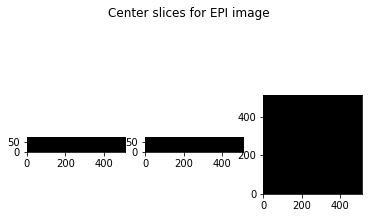

In [ ]:
slice_0 = epi_img_data[30, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

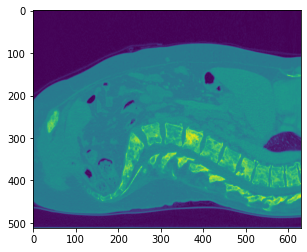

In [ ]:
plt.imshow(image_data[image_data.shape[0]//2])

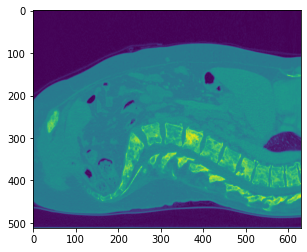

In [ ]:
plt.imshow(image_data[image_data.shape[1]//2])

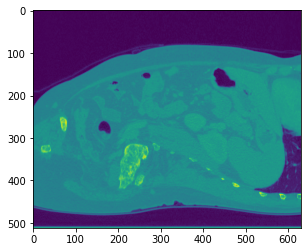

In [ ]:
plt.imshow(image_data[image_data.shape[2]//2])

In [ ]:
!pip install med2image

     |████████████████████████████████| 40 kB 2.4 MB/s 
     |████████████████████████████████| 1.9 MB 6.9 MB/s 
     |████████████████████████████████| 216 kB 56.4 MB/s 
     |████████████████████████████████| 634 kB 55.0 MB/s 
     |████████████████████████████████| 1.0 MB 36.8 MB/s 
  Created wheel for med2image: filename=med2image-2.2.10-py3-none-any.whl size=16593 sha256=78626ebf2829694a77eb5b53d76576c8b10adbb66b753dd947522f53d1675282
  Stored in directory: /root/.cache/pip/wheels/f4/0c/0d/62cc7c6067db46be201b52feaadeec16526f7887e5cd050199
  Created wheel for pfmisc: filename=pfmisc-2.2.8-py3-none-any.whl size=44174 sha256=dd1ff2387c9728f5ce1908aec4211f4525f3c345cfe3fa3de853fc4e9116224b
  Stored in directory: /root/.cache/pip/wheels/b9/60/d3/71224d9220d6a966ba0ec7e0e150e450176ae0913cd85d9b38
  Created wheel for pudb: filename=pudb-2021.1-py3-none-any.whl size=67508 sha256=47d86e3af692f4c1c13ef7c470f4d19d3bc44b16ed3392c300350160577295c4
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
!med2image -i '/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/volume-12.nii'   \
          -d '/content/drive/MyDrive/DATASETS-TESIS/news'   \
          -o sample --outputFileType jpg  \
          --sliceToConvert m

Traceback (most recent call last):
  File "/usr/local/bin/med2image", line 322, in <module>
    imgConverter    = med2image.object_factoryCreate(args).C_convert
AttributeError: 'object_factoryCreate' object has no attribute 'C_convert'


In [ ]:
!med2image --help

In [ ]:
directory = r'/content/drive/MyDrive/DATASETS-TESIS/LITS-Challenge-Test-Data'

In [ ]:
for filename in os.listdir(directory):
  !med2image -i '/content/drive/MyDrive/DATASETS-TESIS/LITS-Challenge-Test-Data/{filename}'   \
          -d '/content/drive/MyDrive/DATASETS-TESIS/lits-test'   \
          -o {filename} --outputFileType jpg  \
          --sliceToConvert m


sliceToConvert: m
2021-08-23 23:11:16  |    2bd381bf1e88 |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-23 23:11:16  |    2bd381bf1e88 |                  med2image.py:med2image.run() | 3D volume detected.

2021-08-23 23:11:16  |    2bd381bf1e88 |             med2image.py:med2image.dim_save() | Image volume logical (i, j, k) size: (512, 512, 163)
2021-08-23 23:11:16  |    2bd381bf1e88 |           med2image.py:med2image.slice_save() | Input file = /content/drive/MyDrive/DATASETS-TESIS/LITS-Challenge-Test-Data/test-volume-0.nii
2021-08-23 23:11:16  |    2bd381bf1e88 |           med2image.py:med2image.slice_save() | Outputfile = /content/drive/MyDrive/DATASETS-TESIS/news//test-volume-0-slice081.jpg
sliceToConvert: m
2021-08-23 23:11:17  |    2bd381bf1e88 |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-23 23:11:17  |    2bd381bf1e88 |                  med2image.py:med2image.run() |

In [ ]:
directory = r'/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1'
for filename in os.listdir(directory):
  !med2image -i '/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/{filename}'   \
          -d '/content/drive/MyDrive/DATASETS-TESIS/lits-train'   \
          -o {filename} --outputFileType jpg  \
          --sliceToConvert m

sliceToConvert: m
2021-08-23 23:57:10  |    2bd381bf1e88 |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-23 23:57:10  |    2bd381bf1e88 |                  med2image.py:med2image.run() | 3D volume detected.

2021-08-23 23:57:10  |    2bd381bf1e88 |             med2image.py:med2image.dim_save() | Image volume logical (i, j, k) size: (512, 512, 75)
2021-08-23 23:57:10  |    2bd381bf1e88 |           med2image.py:med2image.slice_save() | Input file = /content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/volume-0.nii
2021-08-23 23:57:10  |    2bd381bf1e88 |           med2image.py:med2image.slice_save() | Outputfile = /content/drive/MyDrive/DATASETS-TESIS/lits-train//volume-0-slice037.jpg
sliceToConvert: m
2021-08-23 23:57:11  |    2bd381bf1e88 |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-23 23:57:11  |    2bd381bf1e88 |                  med2image.py:med2image.run()

In [ ]:
directory = r'/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 2'
for filename in os.listdir(directory):
  !med2image -i '/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 2/{filename}'   \
          -d '/content/drive/MyDrive/DATASETS-TESIS/lits-train'   \
          -o {filename} --outputFileType jpg  \
          --sliceToConvert m

sliceToConvert: m
2021-08-24 00:36:19  |    25145865b0ea |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-24 00:36:19  |    25145865b0ea |                  med2image.py:med2image.run() | 3D volume detected.

2021-08-24 00:36:19  |    25145865b0ea |             med2image.py:med2image.dim_save() | Image volume logical (i, j, k) size: (512, 512, 129)
2021-08-24 00:36:19  |    25145865b0ea |           med2image.py:med2image.slice_save() | Input file = /content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 2/volume-28.nii
2021-08-24 00:36:19  |    25145865b0ea |           med2image.py:med2image.slice_save() | Outputfile = /content/drive/MyDrive/DATASETS-TESIS/lits-train//volume-28-slice064.jpg
sliceToConvert: m
2021-08-24 00:36:22  |    25145865b0ea |                  med2image.py:med2image.run() | About to perform NifTI to jpg conversion...

2021-08-24 00:36:22  |    25145865b0ea |                  med2image.py:med2image.ru

In [ ]:
!med2image -i '/content/drive/MyDrive/DATASETS-TESIS/LITS Challenge/Training Batch 1/volume-12.nii'   \
          -d '/content/drive/MyDrive/DATASETS-TESIS/news'   \
          -o sample --outputFileType jpg  \
          --sliceToConvert m

In [ ]:
!pip install opencv-python

In [ ]:
import cv2


In [ ]:
imagen = cv2.imread('/content/drive/MyDrive/DATASETS-TESIS/lits-test/test-volume-13-slice053.jpg')

In [ ]:
imagen

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

(512, 512, 3)


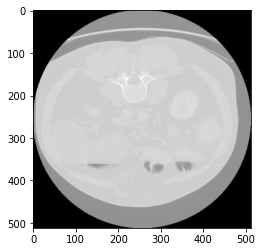

In [ ]:
plt.imshow(image, cmap="gray")
print(image.shape)

(512, 512)


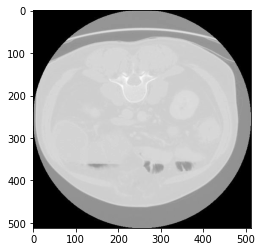

In [ ]:
plt.imshow(gray, cmap="gray")
print(gray.shape)

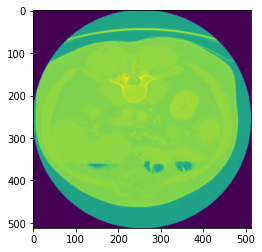

In [ ]:
img_gray_mode = cv2.imread('/content/drive/MyDrive/DATASETS-TESIS/lits-test/test-volume-13-slice053.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray_mode)

In [ ]:
from PIL import image

In [ ]:
!pip install scikit-image

ho (512, 512, 3)
ha (512, 512)


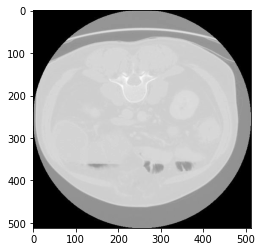

In [ ]:
from skimage import color
from skimage import io

read_img = io.imread('/content/drive/MyDrive/DATASETS-TESIS/lits-test/test-volume-13-slice053.jpg')
print('ho',read_img.shape)
img = color.rgb2gray(read_img)
print('ha',img.shape)
plt.imshow(img, cmap="gray")

8.0


<Figure size 360x360 with 0 Axes>

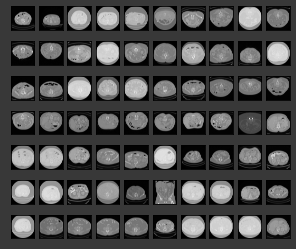

In [ ]:
#directory=os.listdir('/content/drive/MyDrive/DATASETS-TESIS/lits-test')
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/drive/MyDrive/DATASETS-TESIS/lits-test/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5,5))
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('#383838')
columns = 10

print(len(images) / columns + 1)
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.savefig('test_dataset.jpg', facecolor=fig.get_facecolor())

9.733333333333333


<Figure size 720x720 with 0 Axes>

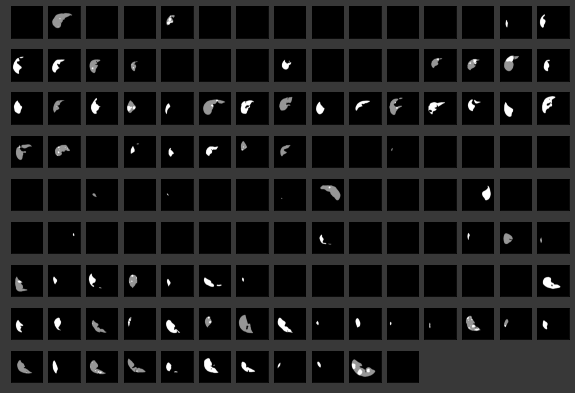

In [ ]:
images = []
for img_path in glob.glob('/content/drive/MyDrive/DATASETS-TESIS/lits-train/masks/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('#383838')
columns = 15

print(len(images) / columns + 1)
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.savefig('dataset-masks.jpg', facecolor=fig.get_facecolor())

9.733333333333333


<Figure size 720x720 with 0 Axes>

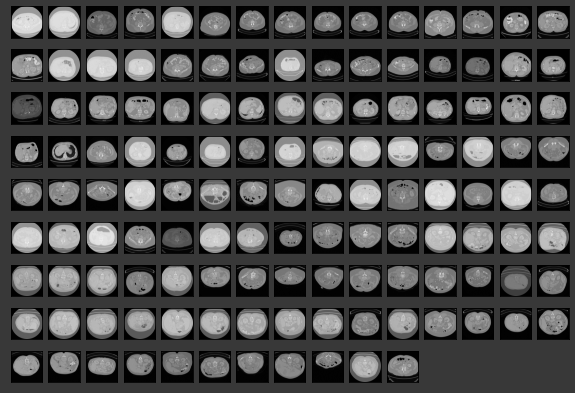

In [ ]:
images = []
for img_path in glob.glob('/content/drive/MyDrive/DATASETS-TESIS/lits-train/volumes/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('#383838')
columns = 15

print(len(images) / columns + 1)
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.savefig('dataset-train.jpg', facecolor=fig.get_facecolor())

# USANDO OPENCV

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DATASETS-TESIS/lits-test/test-volume-13-slice053.jpg',0)

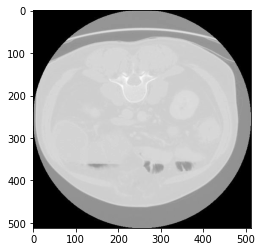

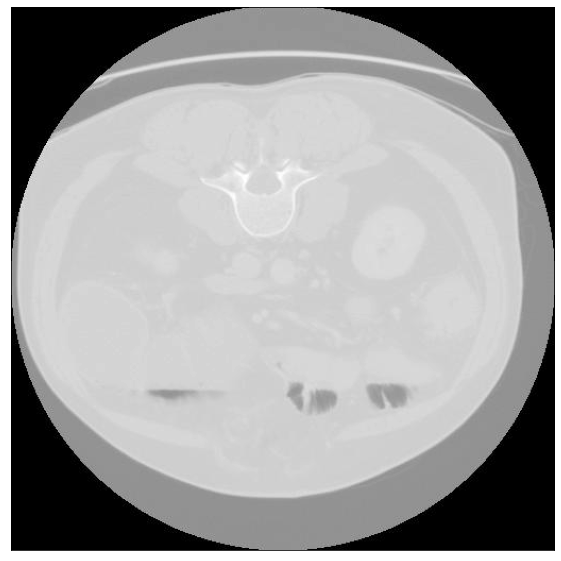

In [ ]:
plt.imshow(img, cmap="gray")


plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#383838')
columns = 15
 
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('original.jpg')

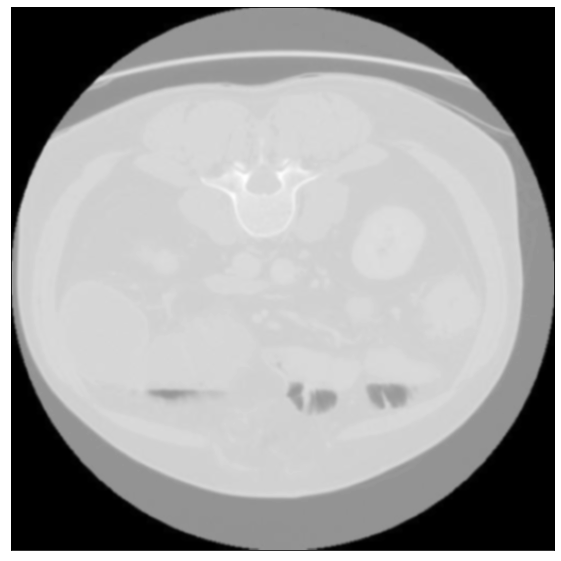

In [ ]:
blur_img = cv2.GaussianBlur(img, (5,5), 0)

plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#383838')
columns = 15
 
plt.imshow(blur_img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('blurrring.jpg')

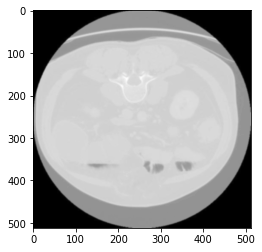

In [ ]:
plt.imshow(blur_img, cmap="gray")

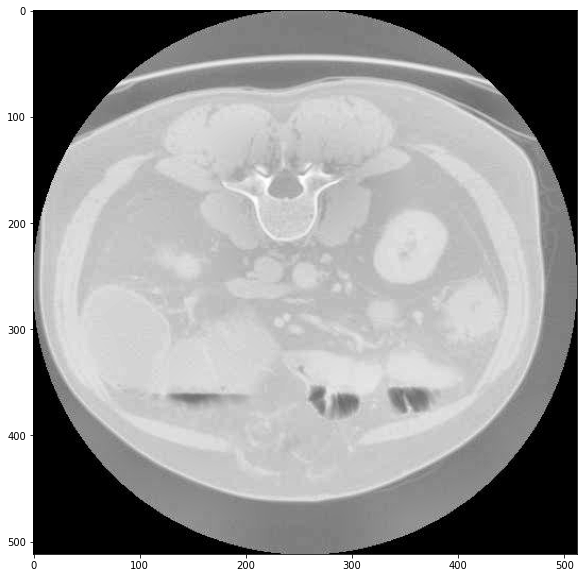

In [ ]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.figure(figsize=(10,10))
plt.imshow(cl1, cmap="gray")

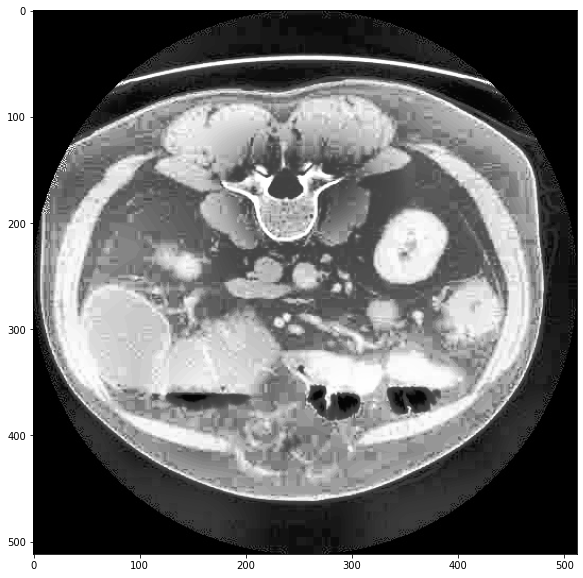

In [ ]:
#img = cv.imread('wiki.jpg',0)
equ = cv2.equalizeHist(cl1)
#res = np.hstack((img,equ)) #stacking images side-by-side
plt.figure(figsize=(10,10))
plt.imshow(equ, cmap="gray")


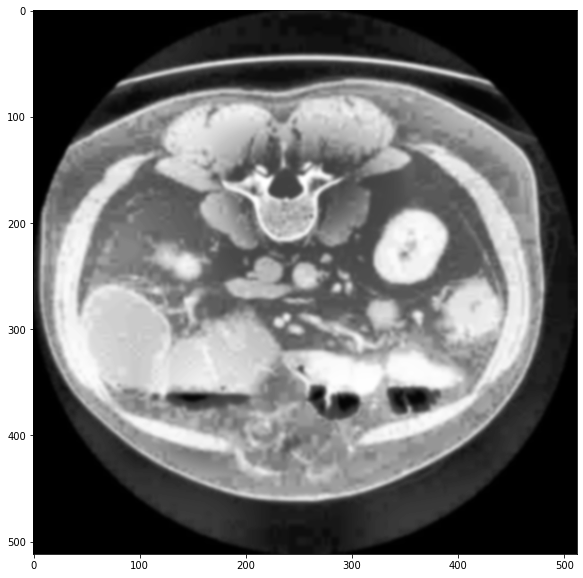

In [ ]:
blur_img = cv2.GaussianBlur(equ, (7,7), 0)
plt.figure(figsize=(10,10))

 
plt.imshow(blur_img, cmap="gray")

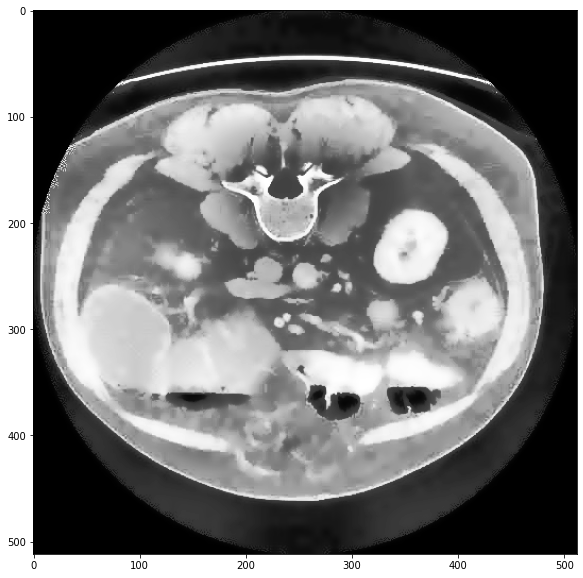

In [ ]:
bilateral = cv2.bilateralFilter(equ, 11,30,30)
plt.figure(figsize=(10,10))

 
plt.imshow(bilateral, cmap="gray")

In [ ]:
I_eq_cv2 = cv2.equalizeHist(blur_img)

#plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap='gray')
#plt.title("cv2.equalizeHist() result")

plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#383838')
columns = 15
 
plt.imshow(I_eq_cv2, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('equalization.jpg')

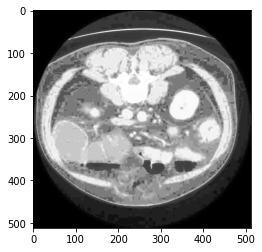

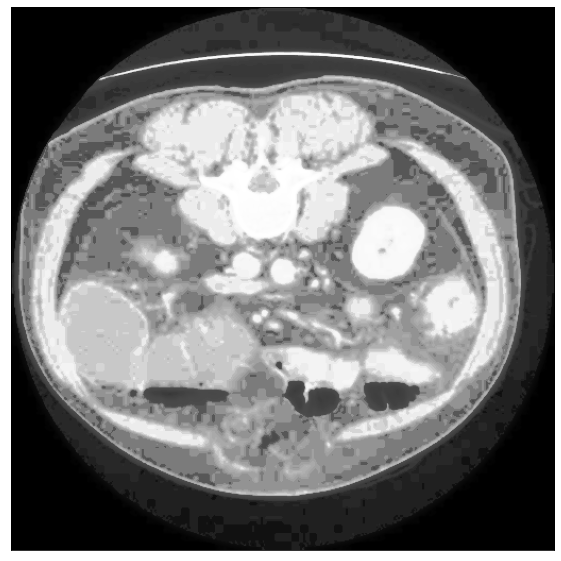

In [ ]:
I_eq_cv2 = cv2.equalizeHist(blur_img)

#plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap='gray')
#plt.title("cv2.equalizeHist() result")

plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#383838')
columns = 15
 
plt.imshow(I_eq_cv2, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('equalization.jpg')